In [2]:
import pandas_datareader as pdr

In [2]:
!pip install pandas_datareader

In [3]:
df=pdr.get_data_tiingo('AAPL',api_key='a5e62013a29d4bde9912aeeaa40509bbcfb07c96')

C:\Users\harir\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-11-14 00:00:00+00:00,148.28,150.28,147.4300,148.970,73374114,148.28,150.28,147.4300,148.970,73374114,0.0,1.0
1253,AAPL,2022-11-15 00:00:00+00:00,150.04,153.59,148.5613,152.215,89868332,150.04,153.59,148.5613,152.215,89868332,0.0,1.0
1254,AAPL,2022-11-16 00:00:00+00:00,148.79,149.87,147.2900,149.130,64218266,148.79,149.87,147.2900,149.130,64218266,0.0,1.0
1255,AAPL,2022-11-17 00:00:00+00:00,150.72,151.48,146.1500,146.430,80389400,150.72,151.48,146.1500,146.430,80389400,0.0,1.0
1256,AAPL,2022-11-18 00:00:00+00:00,151.29,152.70,149.9700,152.305,74829573,151.29,152.70,149.9700,152.305,74829573,0.0,1.0


In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-11-22 00:00:00+00:00,174.96,175.00,173.0500,173.36,24997274,41.590436,41.599944,41.136402,41.210093,99989096,0.0,1.0
1,AAPL,2017-11-24 00:00:00+00:00,174.97,175.50,174.6459,175.10,14026519,41.592813,41.718801,41.515770,41.623716,56106076,0.0,1.0
2,AAPL,2017-11-27 00:00:00+00:00,174.09,175.08,173.3400,175.05,20536313,41.383624,41.618961,41.205339,41.611830,82145252,0.0,1.0
3,AAPL,2017-11-28 00:00:00+00:00,173.07,174.87,171.8600,174.30,25468442,41.141156,41.569041,40.853522,41.433544,101873768,0.0,1.0
4,AAPL,2017-11-29 00:00:00+00:00,169.48,172.92,167.1600,172.63,40788324,40.287763,41.105499,39.736267,41.036562,163153296,0.0,1.0


In [9]:
df.iloc[0:1,:1]

,symbol
0,AAPL


In [10]:
df1=df.reset_index()['close']

In [11]:
df1

0       174.96
1       174.97
2       174.09
3       173.07
4       169.48
         ...  
1252    148.28
1253    150.04
1254    148.79
1255    150.72
1256    151.29
Name: close, Length: 1257, dtype: float64

In [12]:
df1.shape

(1257,)

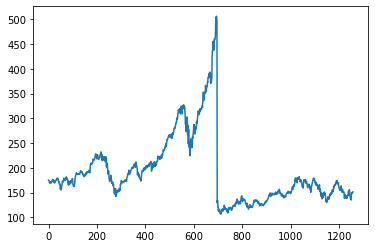

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
#LSTM is more sensitive to the scale of the data then apply mixmax scaler
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1257, 1)

In [17]:
df1

array([[0.17061991],
       [0.17064496],
       [0.16844083],
       ...,
       [0.10507201],
       [0.10990607],
       [0.11133375]])

In [18]:
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [19]:
train_data.shape

(817, 1)

In [20]:
train_data.size

817

In [21]:
test_data.size

440

In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [23]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [24]:
print(X_train)

[[0.17061991 0.17064496 0.16844083 ... 0.17277395 0.17883532 0.17783344]
 [0.17064496 0.16844083 0.16588604 ... 0.17883532 0.17783344 0.16520977]
 [0.16844083 0.16588604 0.15689418 ... 0.17783344 0.16520977 0.14747652]
 ...
 [0.00345648 0.01362555 0.02033813 ... 0.07145899 0.06599875 0.06011271]
 [0.01362555 0.02033813 0.01815905 ... 0.06599875 0.06011271 0.0572824 ]
 [0.02033813 0.01815905 0.02246713 ... 0.06011271 0.0572824  0.05768316]]


In [25]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape),print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [27]:
#reshape into three dimensional features
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [28]:
#Creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 349ms/step - loss: 0.0562 - val_loss: 0.0126
Epoch 2/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0153 - val_loss: 0.0033
Epoch 3/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0109 - val_loss: 5.1957e-04
Epoch 4/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0102 - val_loss: 6.2917e-04
Epoch 5/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0083 - val_loss: 3.1799e-04
Epoch 6/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0104 - val_loss: 0.0053
Epoch 7/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0077 - val_loss: 2.7359e-04
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0074 - val_loss: 0.0018
Epoch 9/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0065 - val_loss: 3.8380e-04
Epoch 10/100
12/12 [==============================] - 2s 189ms/step - 

12/12 [==============================] - 2s 181ms/step - loss: 0.0025 - val_loss: 4.7376e-04
Epoch 79/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0018 - val_loss: 2.3400e-04
Epoch 80/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0015 - val_loss: 3.3064e-04
Epoch 81/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0015 - val_loss: 2.1719e-04
Epoch 82/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0012 - val_loss: 2.3491e-04
Epoch 83/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0010 - val_loss: 2.7630e-04
Epoch 84/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0024 - val_loss: 4.1625e-04
Epoch 85/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0016 - val_loss: 4.5411e-04
Epoch 86/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0016 - val_loss: 2.6673e-04
Epoch 87/100
12/12 [==============================] - 2s 18

In [32]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 45ms/step


In [33]:
#transform into original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

230.42255137773137

In [35]:
math.sqrt(mean_squared_error(y_test,test_predict))

156.4012391229204

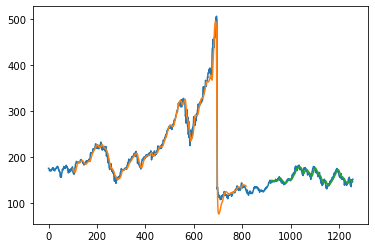

In [36]:
look_back=100
trainpredictplot=numpy.empty_like(df1)
trainpredictplot[:,:]=numpy.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict

testpredictplot=numpy.empty_like(df1)
testpredictplot[:,:]=numpy.nan
testpredictplot[len(train_predict)+(2*look_back)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [41]:
len(test_data)

440

In [43]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.08037570444583592,
 0.08696305572949276,
 0.09036944270507191,
 0.09896055103318718,
 0.10068879148403248,
 0.09525360050093923,
 0.0977332498434565,
 0.09680651221039449,
 0.10427050720100184,
 0.10852849092047584,
 0.1007639323731997,
 0.11060738885410137,
 0.11571696931747022,
 0.12150281778334371,
 0.1183469004383218,
 0.11549154664996863,
 0.11211020663744514,
 0.12510958046336873,
 0.12651221039448962,
 0.139436443331246,
 0.13693174702567307,
 0.13317470256731367,
 0.1485034439574201,
 0.1477019411396368,
 0.14654978083907322,
 0.1453475266123982,
 0.14547276142767684,
 0.15629304946775202,
 0.1544145272385723,
 0.16345648090169063,
 0.16618659987476514,
 0.16578584846587346,
 0.1695929868503444,
 0.1685911083281152,
 0.16200375704445835,
 0.15211020663744512,
 0.15125860989355033,
 0.15201001878522225,
 0.15827175954915462,
 0.142216656230432,
 0.1366061365059486,
 0.13041953663118344,
 0.12618659987476516,
 0.12804007514088916,
 0.1226549780839073,
 0.1194489668127739,
 0.1

In [49]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


0 day input [0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579
 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487
 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838
 0.10973075 0.09565435 0.08025047 0.07899812 0.080350

9 day output [[0.10947054]]
10 day input [0.11060739 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021
 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344
 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453
 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.1050720

18 day output [[0.11306306]]
19 day input [0.13693175 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753
 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585
 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002
 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008
 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076
 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851
 0.11742016 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194
 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623
 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812
 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511
 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075
 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664
 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607
 0.11133375 0.10205823 0.10205823 0.10489073 0.10564418 0.10621285
 0.10670305 0.1071681

27 day output [[0.11603232]]
28 day input [0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10205823 0.10205823
 0.10489073 0.10564418 0.10621285 0.10670305 0.10716817 0.10762979
 0.10809327 0.10855693 0.1090172  0.10947054 0.10991435 0.11034703
 0.11076787 0.111176

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

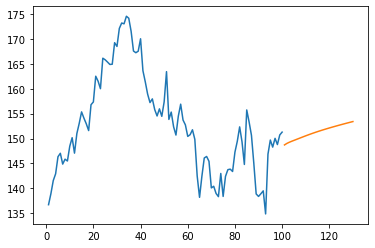

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


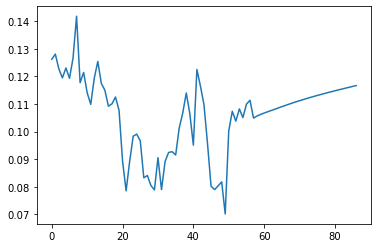

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [56]:
df3=scaler.inverse_transform(df3).tolist()

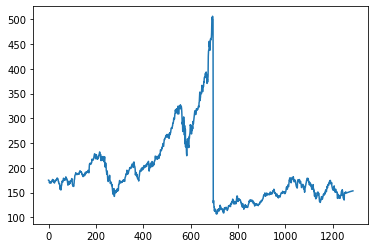

In [57]:
plt.plot(df3)